In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

In [2]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils import *
import CMS_lumi
import scipy.stats

Welcome to JupyROOT 6.20/02


In [9]:
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
print(n_ma_bins)
print(ma_bins)

140
[-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2]


In [4]:
do_coarse = True

dS = 2
#dS = 4
steps = np.arange(dS,2*dS+dS,dS)/1.e3
if do_coarse:
    scale_nom = 1.
    smear_nom = 0.
    #scales_ = np.concatenate([[-0.004], np.arange(0,56+8,8)/1.e3])
    scales_ = np.concatenate([[-0.004], np.arange(0,56+4,4)/1.e3])
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    #scales_ = np.concatenate([[-0.036, -0.032, -0.028, -0.024, -0.020, -0.016, -0.012, -0.008, -0.004], np.arange(0,0+4,4)/1.e3])#8+4
    #scales_ = np.concatenate([[-0.008, -0.004], np.arange(0,12+4,4)/1.e3])#8+4
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    smears_ = np.concatenate([np.arange(0,20+2,2)/1.e3])
else:
    scale_nom = 1.046 # use values from coarse scan
    smear_nom = 0.00 # use values from coarse scan
    scales_ = np.concatenate([-np.flip(steps), [0.], steps])
    smears_ = np.concatenate([-np.flip(steps), [0.], steps])

smears_ = np.array([sm for sm in smears_ if smear_nom+sm >= 0.]) # only allow positive smearing

In [10]:
chisqs_ = np.flipud(
[[ 24574.19408342,  25310.19352127,  27268.4692689  , 30955.63778766
,   36126.94043702,  44371.05360175,  54913.37067695 , 66639.17893361
,   83229.11172016, 100935.10499392, 121818.95437066]
, [ 22190.59127825,  22914.52770616,  24699.8253825  , 27575.0352939
,   32917.82929559,  40753.67821915,  49850.06917512 , 64010.7009146
,   79596.39638397,  95451.21038146, 117266.20346141]
, [ 20661.37970656,  21030.44051829,  22784.35996082 , 25418.65396967
,   30432.98176357,  38120.36538499,  47427.48853714 , 60785.10047104
,   74460.12582329,  90768.39209143, 109575.3132724 ]
, [ 19471.33306262,  20010.69490747,  21067.50421751 , 23573.96009364
,   28157.25873844,  35723.2750652 ,  44149.37389275 , 56465.66009074
,   71708.08735049,  87785.6414252 , 107130.35070346]
, [ 18989.25727397,  19484.73503558,  20704.13775517 , 22769.07570392
,   26624.6726252 ,  33195.50503873,  42132.83222483 , 54125.22603542
,   68333.38216281,  83140.83415572, 103301.60380706]
, [ 19851.20916337,  19871.45233247,  20596.05882201 , 22116.92225613
,   26000.48791203,  31734.91015296,  40598.61550718 , 50166.83252622
,   65375.96718824,  81103.81227128,  97933.4544445 ]
, [ 20777.36827629,  21002.00301732,  21122.75808006 , 22647.17252165
,   26210.45151658,  30932.373462  ,  37638.98079939 , 48607.99808579
,   62963.72632467,  78894.74514258,  96269.00524869]
, [ 22733.00156063,  22558.21569031,  22792.57966674 , 23485.94494985
,   26393.74311391,  31142.33479326,  38630.00447134 , 48899.69736219
,   60564.11722961,  76303.1168622 ,  94249.47467533]
, [ 25508.49212089,  25283.81312261,  25219.20121169 , 25999.87614389
,   26853.87113682,  31319.35973837,  37771.25728034 , 48398.20152482
,   59634.50015449,  73815.3936334 ,  90517.30879912]
, [ 29134.35343769,  28683.08475753,  27927.85288634 , 27734.99370113
,   28802.20665197,  32520.47257401,  38248.83045847 , 47110.56668638
,   58664.65290105,  72892.37410384,  91152.34616666]
, [ 33383.80002311,  33037.69247144,  31667.98149092 , 31263.40027389
,   31172.54290911,  34471.8354363 ,  39948.31380886 , 49418.66354891
,   57681.50801682,  70900.58881696,  89076.96806936]
, [ 38723.91159467,  38496.67581645,  36654.83995122 , 35077.99372826
,   35163.87260683,  36748.92999617,  40863.79117391 , 46727.82531424
,   59203.22900646,  71740.67154611,  86442.45208884]
, [ 45125.11450324,  44275.71129863,  42111.20838662 , 39909.82390489
,   39063.27977573,  40388.31914233,  44121.62095866 , 50428.58252063
,   62022.56659928,  72147.45470503,  86671.88166351]
, [ 52384.81222516,  51091.59223803,  48397.31379024 , 46177.72484994
,   43800.37299323,  44337.3090077 ,  46017.95791946 , 52545.30664518
,   61826.25416646,  73874.94164401,  89673.33816782]
, [ 60369.31077927,  59223.61597955,  56567.61592132 , 52894.40704209
,   49278.16253987,  48427.27094099,  51043.57634622 , 55466.09149522
,   63341.75790156,  73869.05037997,  87640.51827161]
, [ 69603.86092137,  68435.55422263,  64876.80186403 , 60468.44250252
,   55852.11461566,  54297.59132559,  55620.97667643 , 59989.20390317
,   66762.89038071,  78033.3974708 ,  90036.99248775]]
)
print(chisqs_.shape)

(16, 11)


In [14]:
pvals = np.zeros_like(chisqs_)

for ir in range(chisqs_.shape[0]):
    for ic in range(chisqs_.shape[1]):
        #pvals[ir,ic] = ROOT.TMath.Prob(chisqs_[ir,ic], 140)
        print(chisqs_[ir,ic])
        pval_ = ROOT.TMath.Prob(chisqs_[ir,ic], 140)
        print(pval_)
        break
        
print(pvals)

69603.86092137
0.0
60369.31077927
0.0
52384.81222516
0.0
45125.11450324
0.0
38723.91159467
0.0
33383.80002311
0.0
29134.35343769
0.0
25508.49212089
0.0
22733.00156063
0.0
20777.36827629
0.0
19851.20916337
0.0
18989.25727397
0.0
19471.33306262
0.0
20661.37970656
0.0
22190.59127825
0.0
24574.19408342
0.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
conts = chisqs_.flatten()
len(conts[conts>(chisqs_.min()+10000)])

131

smears 11 0.0 20.0
scales 16 -0.4 5.6000000000000005
chisq, min,max: 18989.25727397 121818.95437066
0.0 20.0
13 TeV


Warning in <TCanvas::Constructor>: Deleting canvas with same name: conts


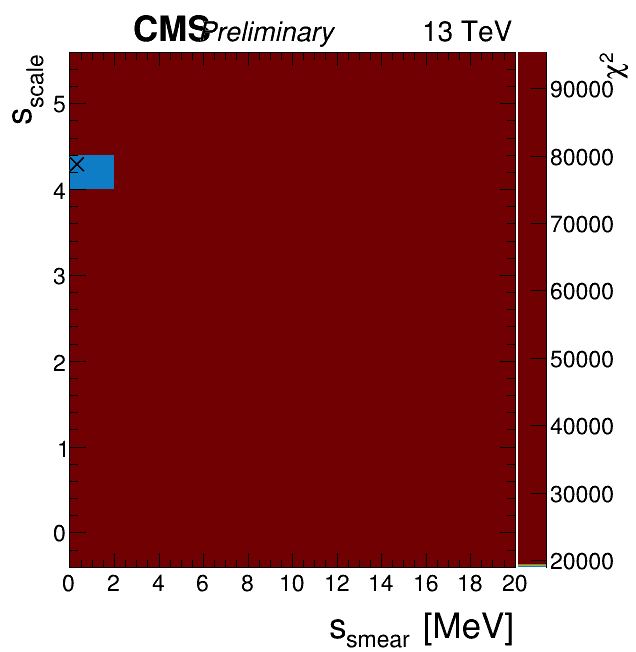

In [26]:
plot_dir = 'Plots/massreg/v12'
print_pdf = False

#hConts = ROOT.TH2F('hConts', len(smears_)-1, smears_[0], smears_[-1],\
#                             len(scales_)-1, scales_[0], scales_[-1])
c,h = {}, {}

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.17
iPeriod = 0

smears = 1.e3*np.array(smears_)
scales = 1.e2*np.array(scales_)

print('smears', len(smears), smears[0], smears[-1])
print('scales', len(scales), scales[0], scales[-1])
print('chisq, min,max:', chisqs_.min(), chisqs_.max())

k = 'conts'
#c[k] = ROOT.TCanvas(k, k, 680, 600)
c[k] = ROOT.TCanvas(k, k, 640, 680)
#h[k] = ROOT.TH2F(k, k, len(smears)-1, array('d', smears),\
#                       len(scales)-1, array('d', scales))
h[k] = ROOT.TH2F(k, k, len(smears)-1, 0., 20.,\
                       len(scales)-1, -0.4, 5.6)
h[k+'graph'] = ROOT.TGraph2D()
h[k+'optim'] = ROOT.TGraph2D()
i = 0
for a in range(len(scales)):
    for b in range(len(smears)):
        h[k].SetBinContent(b+1, a+1, chisqs_[a,b])
        '''h[k].SetBinContent(b+1, a+1, 0.)
        #print(a, b, scales[a], smears[b], chisqs_[a,b])
        h[k+'graph'].SetPoint(i, smears[b], scales[a], chisqs_[a,b])
        if a == 4 and b == 1:
            h[k+'optim'].SetPoint(i, smears[b], 1.+scales[a], chisqs_[a,b])
        else:
            h[k+'optim'].SetPoint(i, smears[b], 1.+scales[a], 0.)'''
        i += 1
    #break

'''
# Dont work
#h[k+'optim'] = ROOT.TGraph2D()
#h[k+'p'] = ROOT.TH2F(k+'p', k+'p', len(smears)-1, 0., 20.,\
#                       len(scales)-1, -0.4, 5.6)
#h[k+'optim'].SetPoint(0, 0., 4.2, 25.e3) # (i, x, y, z)
#h[k+'optim'].SetPoint(1, 0., 4.2, 25.e3) # (i, x, y, z)
#h[k+'p'].SetBinContent(0, 4, -25.e3)
'''
'''
contours[6];
contours[0] = -0.7;
contours[1] = -0.5;
contours[2] = -0.1;
contours[3] =  0.1;
contours[4] =  0.4;
contours[5] =  0.8;
HistStreamFn->SetContour(6, contours);

'''
contours = [chisqs_.min(), chisqs_.min()+140, chisqs_.min()+280, chisqs_.min()+280+140]
contours = array('d', contours)
h[k].SetContour(len(contours), contours)
#ROOT.gStyle.SetNumberContours(10) # default:20
ROOT.TGaxis.fgMaxDigits = 3
ROOT.gStyle.SetOptStat(0)

#h[k] = set_hist(h[k], "#Deltasmear [MeV]", "#Deltascale [%]", "")
h[k] = set_hist(h[k], "s_{smear} [MeV]", "s_{scale}", "")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.13)
ROOT.gPad.SetLeftMargin(0.11)
ROOT.gPad.SetRightMargin(0.19) # with colz
#ROOT.gPad.SetRightMargin(0.1) # without colz
ROOT.gStyle.SetPalette(55)#53
ROOT.TGaxis.fgMaxDigits = 3
h[k].SetTitle('')

h[k].GetYaxis().SetTitleOffset(0.7)
h[k].GetYaxis().SetTitleSize(0.06)
h[k].GetYaxis().SetLabelFont(42)
h[k].GetYaxis().SetTitleFont(42)

h[k].GetZaxis().SetTitle('#chi^{2}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(42)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(42)

h[k].GetXaxis().SetTitleOffset(1.0)
h[k].GetXaxis().SetTitleSize(0.06)
h[k].GetXaxis().SetLabelFont(42)
h[k].GetXaxis().SetTitleFont(42)
#h[k].GetXaxis().SetRangeUser(smears[0], smears[-1])
print(smears[0], smears[-1])

h[k].SetMinimum(chisqs_.min()) 
#h[k].SetMaximum(130.e3)
#h[k].SetMaximum(chisqs_.min()+140.)
h[k].Draw("COL Z")
#h[k].Draw("COL")
'''
# Workaround: Draw graph on top of empty hist
# otherwise axes arent drawn
#h[k+'graph'].GetZaxis().SetTitle('#chi^{2}')
#h[k+'graph'].GetZaxis().SetTitleOffset(1.3)
#h[k+'graph'].GetZaxis().SetTitleSize(0.05)
#h[k+'graph'].GetZaxis().SetTitleFont(62)
#h[k+'graph'].GetZaxis().SetLabelSize(0.04)
#h[k+'graph'].GetZaxis().SetLabelFont(62)
#h[k+'graph'].Draw("CONT1 same")
h[k+'graph'].Draw("CONT2 same")
#h[k+'graph'].Draw("COLZ")
'''
# Draw optimial point
optim = ROOT.TLatex()
optim.DrawLatex(0., 4.2, '#times')

c[k].Draw()
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Update()
#if print_pdf: c[k].Print('%s/DYToEE_%so%s_eta%s_ma1_ptetarwgt_scale-vs-smear.pdf'%(plot_dir, kdata, kmc, eta_range))